# Deep Learning for Text with PyTorch 

conda install pytorch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 cpuonly -c pytorch 
pip install torchtext

# Data Preprocessing
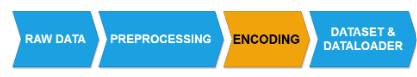

In [ ]:
from torchtext.data.utils import get_tokenizer

In [ ]:
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer("I am reading a book now. I love to read books!") 
print(tokens)

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
stop_words = set (stopwords.words ('english'))
tokens = ["I", "am", "reading", "a", "book", "now", "books", "!"]
"I", "Love", "to", "read",
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

In [ ]:
filtered_tokens

In [ ]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
filtered_tokens = ["reading", "book", ".", "loving", "read", "books", "!"]
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(stemmed_tokens)

In [ ]:
from nltk.probability import FreqDist
stemmed_tokens= ["read", "book", ".", "love", "read", "book", "!"]
freq_dist =FreqDist(stemmed_tokens)
threshold = 2
common_tokens = [token for token in stemmed_tokens if freq_dist[token] >= threshold] 
print(common_tokens)

# Encoding

In [ ]:
import torch
vocab = ['cat', 'dog', 'rabbit']
vocab_size = len(vocab)
one_hot_vectors = torch.eye(vocab_size)

one_hot_dict = {word: one_hot_vectors [i] for i, word in enumerate (vocab)} 
print(one_hot_dict)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = ['This is the first document.', 'This document is the second document.',
'And this is the third one.', 'Is this the first document?']
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out())
# Output term frequecy matrix

TFID : across all documents - emphasizes informative words in text data <br>
Lower score - common words <br>
Higher score - rare words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = ['This is the first document.', 'This document is the second document.',
'And this is the third one.', 'Is this the first document?']
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out())

In [ ]:
# Import libraries
from torch.utils.data import Dataset, DataLoader # Create a class
class TextDataset (Dataset):
    def __init__(self, text):
        self.text = text
    def __len__(self):
        return len(self.text)
    def __getitem__(self, idx):
        return self.text[idx]

In [ ]:

def preprocess_sentences (sentences):
    processed_sentences = []
    for sentence in sentences:
        sentence = sentence.lower() 
        tokens=tokenizer(sentence)
        tokens = [token for token in tokens if token not in stop_words]
        tokens = [stemmer.stem(token) for token in tokens]
        freq_dist= FreqDist(tokens)
        threshold = 1
        tokens = [token for token in tokens if freq_dist[token] >= threshold]
        processed_sentences.append( ' '.join(tokens))
        return processed_sentences

In [ ]:
def encode_sentences (sentences):
    vectorizer = CountVectorizer()
    return sentences, vectorizer
    X=vectorizer.fit_transform(sentences)
    encoded_sentences = X.toarray()
    return encoded_sentences, vectorizer

In [ ]:
import regex as re
def extract_sentences (data):
    sentences = re.findall(r'[A-Z][^.!?]*[.!?]',data)
    return sentences

# Text Preprocessing pipeline

In [ ]:
def text_processing_pipeline(text):
    tokens = preprocess_sentences(text)
    encoded_sentences, vectorizer = encode_sentences(tokens) 
    dataset = TextDataset(encoded_sentences)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True) 
    return dataloader, vectorizer

In [ ]:
text_data = "This major big is the first text data. And here extra is another one."
sentences = extract_sentences(text_data)
dataloader, vectorizer = text_processing_pipeline(sentences)
# print(next(iter(dataloader))[0,:10])

In [ ]:
print(next(iter(dataloader)))

In [ ]:
print(next(iter(dataloader)))

# Text Classification

### Word Embeddings

In [ ]:
import torch
from torch import nn
words = ["The", "cat", "sat", "on", "the", "mat"]
word_to_idx = {word: i for i, word in enumerate (words)}
inputs = torch.LongTensor ([word_to_idx [w] for w in words])
embedding = nn.Embedding(num_embeddings=len (words), embedding_dim=10) 
output = embedding (inputs)
print(output)

In [ ]:
for batch in dataloader:
    output = embedding(batch)
    print(output)

In [ ]:
text_data = ["This is the first text data"]
dataloader, vectorizer = text_processing_pipeline(text_data)

# CNN FOR TEXT

In [ ]:
import torch
from torch import nn
class SentimentAnalysisCNN (nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embedding = nn.Embedding (vocab_size,
        embed_dim)
        self.conv = nn.Convld (embed_dim, embed_dim,
        kernel_size=3, stride=1,
        padding=1)
        self.fc = nn.Linear(embed_dim, 2)

        
    def forward(self, text):
        self.embedding(text).permute(0, 2, 1)
        conved = F.relu(self.conv(embedded))
        conved = conved.mean(dim=2)
        return self.fc(conved)

In [ ]:

vocab = ["i", "love", "this", "book", "do", "not", "like"] 
word_to_idx = {word: i for i, word in enumerate(vocab)}
vocab_size = len(word_to_ix)
embed_dim= 10
book_samples = [
("The story was captivating and kept me hooked until the end.".split(),1),
("I found the characters shallow and the plot predictable.".split(),0)
    ]
model = SentimentAnalysisCNN(vocab_size, embed_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD (model.parameters(), lr=0.1)

In [ ]:
for epoch in range(10):
    for sentence, label in data:
        model.zero_grad()
        sentence = torch.LongTensor([word_to_idx.get(w, 0) for w in sentence]).unsqueeze(0)
        outputs = model (sentence)
        label = torch.LongTensor([int(label)])
        loss = criterion(outputs, label)
        
from torchmetrics import Accuracy
actual
torch. tensor ([0, 1, 1, 0, 1, 0])
predicted = torch.tensor ([0, 0, 1, 0, 1, 1])
accuracy = Accuracy(task="binary", num_classes=2)
acc accuracy (predicted, actual)
print (f"Accuracy: {acc}")
        optimizer.step()

In [ ]:
for sample in book_samples:
    input_tensor = torch.tensor([word_to_idx [w] for w in sample], dtype=torch.long).unsqueeze(0) 
    outputs = model(input_tensor)
    -, predicted_label = torch.max(outputs.data, 1)
    sentiment = "Positive" if predicted_label.item() == 1 else "Negative"
    print (f"Book Review: {' '.join(sample)}")
    print(f"Sentiment: {sentiment}\n")

# RNN

In [ ]:
# Import libraries
from torch.utils.data import Dataset, DataLoader
# Create a class
class TextDataset(Dataset):
    def __init__(self, text):
        self.text = text
    def __len__(self):
        return len(self.text)
    def __getitem__(self, idx):
        return self.text[idx]

In [ ]:
class LSTMModel (nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super (LSTMModel, self).__init__()
        self.lstm = nn. LSTM(input_size, hidden_size, batch_first=True) 
        self.fc = nn. Linear (hidden_size, output_size)
    def forward(self, x):
        _, (hidden,_ ) = self.lstm(x)
        output = self.fc (hidden.squeeze (0))
        return output

In [ ]:
from torchmetrics import Accuracy
actual=torch. tensor ([0, 1, 1, 0, 1, 0])
predicted = torch.tensor ([0, 0, 1, 0, 1, 1])
accuracy = Accuracy(task="binary", num_classes=2)
acc accuracy (predicted, actual)
print (f"Accuracy: {acc}")

In [ ]:

from torchmetrics import Precision, Recall 
precision = Precision (task="binary", num_classes=2)
recall= Recall(task="binary", num_classes=2)
prec precision (predicted, actual)
rec = recall(predicted, actual)

In [ ]:

from torchmetrics import F1Score
f1 = F1Score (task="binary", num_classes=2) 
f1_score = f1 (predicted, actual) print("F1 Score: {f1_score}")

# Text Generation

In [ ]:
import torch
import torch.nn as nn
data = "Hello how are you?"
chars = list(set(data))
char_to_ix = {char: i for i, char in enumerate(chars)} 
ix_to_char = {i: char for i, char in enumerate(chars)}
class RNNModel (nn.Module):
    def __init__(self, input_size, hidden_size, output_size): 
        super (RNNModel, self).__init__() 
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True) 
        self.fc = nn. Linear (hidden_size, output_size)


    def forward(self, x):
        h0= torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out
model = RNNmodel(1, 16, 1)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam (model.parameters(), lr=0.01)

In [ ]:
inputs = [char_to_ix [ch] for ch in data[:-1]] 
targets == [char_to_ix[ch] for ch in data[1:]]
inputs = torch.tensor (inputs, dtype=torch.Long) .view(-1, 1)
inputs = nn. functional.one_hot(inputs, num_classes=len(chars)).float()
targets = torch.tensor (targets, dtype=torch.Long)

In [ ]:
for epoch in range(100):
    model.train()
    outputs= model(inputs)
    loss =criterion(outputs, targets)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/100, Loss: {loss.item()}')

In [ ]:
model.eval()
test_input char_to_ix['h']
test_input = nn. functional.one_hot (torch.tensor (test_input).view(-1, 1), num_classes=len (chars)).float()
predicted_output=model (test_input)
predicted_char_ix = torch.argmax(predicted_output, 1).item()
print(f'Test Input: 10, Predicted Output: {model (test_input).item()})

# Generative adversarial networks for text generatio

In [ ]:
class Generator (nn. Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
        nn.Linear(seq_length, seq_length),
        nn.Sigmoid()        )
    def forward(self, x):
        return self.model(x)

In [ ]:
class Discriminator (nn. Module):
    def __init__(self):
        super().__init__()
        self.model=nn. Sequential(
        nn.Linear(seq_length, 1),
        nn.Sigmoid()        )
    def forward(self, x):
        return self.model(x)

In [ ]:
generator = Generator()
discriminator = Discriminator()
criterion = nn. BCELoss()
optimizer_gen = torch.optim. Adam (generator.parameters(), lr=0.001) 
optimizer_disc = torch.optim.Adam(discriminator.parameters(), lr=0.001)

In [ ]:

num_epochs = 50
for epoch in range (num_epochs):
    for real_data in data:
        real_data = real_data.unsqueeze (0) 
        noise = torch.rand((1, seq_length)) 
        disc_real = discriminator(real_data)
        fake_data = generator (noise)
        disc_fake = discriminator (fake_data.detach())
        loss_disc = criterion (disc_real, torch.ones_like(disc_real)) + criterion (disc_fake, torch.zeros_like(disc_fake))
        optimizer_disc.zero_grad()
        loss_disc.backward()
        optimizer_disc.step()

        disc_fake = discriminator (fake_data)
        loss_gen = criterion (disc_fake, torch.ones_like(disc_fake))
        optimizer_gen.zero_grad()
        Loss_gen.backward ()
        optimizer_gen.step()
        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}:\t
            Generator loss: {loss_gen.item()}\t
            Discriminator loss: {loss_disc.item()}")
        print("\nReal data: ") print(data[:5])
        print("\nGenerated data: ") for in range(5):
        noise torch.rand((1, seq_length)) generated_data = generator (noise)
        print(torch.round (generated_data).detach())

# Pre-trained models for text generation

In [ ]:
# rm -rf /.cache/torch
# rm -rf ~/.cache/huggingface

# pip install torch torchvision --index-url https://download.pytorch.org/whl/cu117
# pip install transformers

# pip install --upgrade torch torchvision transformers

!pip uninstall torchvision transformers
!pip install torchvision transformers


In [ ]:
pip show torch torchvision transformers


In [ ]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel 
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
seed_text = "Once upon a time"
input_ids = tokenizer.encode(seed_text, return_tensors='pt')

In [ ]:
output=model.generate (input_ids, max_length=40, temperature=0.7,
no_repeat_ngram_size=2,
pad_token_id=tokenizer.eos_token_id)

In [ ]:
generated_text= tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

## Translation

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration 
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small") 
input_prompt = "translate English to French: 'Hello, how are you?'" 
input_ids = tokenizer.encode(input_prompt, return_tensors="pt") 
output = model.generate(input_ids, max_length=100)

In [ ]:
generated_text=tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated text: ", generated_text)

# Evaluation

In [ ]:

from torchmetrics.text import BLEUScore
generated_text = ['the cat is on the mat']
real_text = [['there is a cat on the mat', 'a cat is on the mat']]
bleu =BLEUScore ()
bleu_metric = bleu (generated_text, real_text)
print("BLEU Score: ", bleu_metric.item())

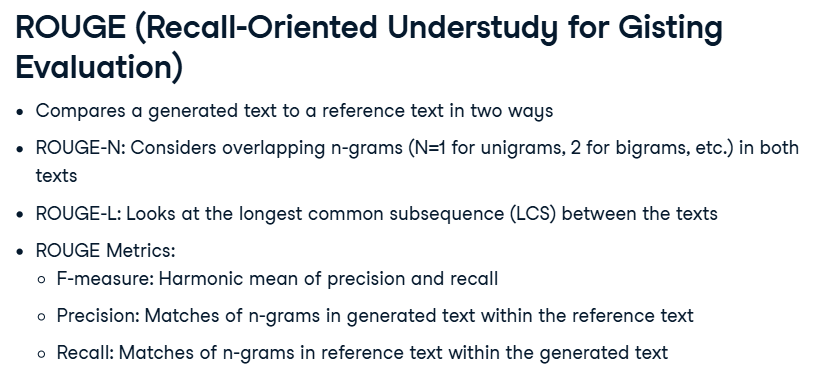

In [ ]:

from torchmetrics.text import ROUGEScore
generated_text='Hello, how are you doing?' 
real_text= "Hello, how are you?"
rouge= ROUGEScore ()
rouge_score = rouge ([generated_text], [[real_text]]) 
print("ROUGE Score:", rouge_score)

# BERT Finetunning

In [ ]:
texts = ["I love this!",
"This is terrible.", "Amazing experience!",
"Not my cup of tea."]
labels = [1, 0, 1, 0]
import torch
from transformers import BertTokenizer, BertForSequenceClassification 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)
inputs = tokenizer(texts, padding=True, truncation=True,
return_tensors="pt", max_length=32)
inputs["labels"] = torch.tensor(labels)

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00001) 
model.train()
for epoch in range(10):
    outputs = model (**inputs)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print (f"Epoch: {epoch+1}, Loss: {loss.item()}")

In [ ]:
text = "I had an awesome day!"
input_eval = tokenizer(text, return_tensors="pt", truncation=True,padding=True, max_length=128)
outputs_eval=model (**input_eval)
predictions = torch.nn.functional.softmax(outputs_eval.logits, dim=-1)
predicted_label = 'positive' if torch.argmax (predictions) > 0 else 'negative' 
print(f"Text: {text}\nSentiment: {predicted_label}")

In [ ]:

sentences = ["I love this product", "This is terrible", "Could be better", "This is the best"]
labels = [1, 0, 0, 1]
train_sentences = sentences[:3]
train_labels = labels[:3]
test_sentences = sentences [3:]
test_labels = labels [3:]

In [ ]:
import torch
import torch.nn as nn
class TransformerEncoder (nn.Module):
    def __init__(self, embed_size, heads, num_layers, dropout): 
        super (TransformerEncoder, self).__init__()
        self.encoder = nn.TransformerEncoder(
        nn.TransformerEncoderLayer(d_model=embed_size, nhead=heads), num_layers=num_layers)
        self.fc = nn.Linear(embed_size, 2)
    def forward(self, x):
        x = self.encoder(x)
        x = x.mean (dim=1)
        return self.fc(x)
model = TransformerEncoder(embed_size=512, heads=8, num_layers=3, dropout=0.5) 
optimizer =optim.Adam (model.parameters(), Lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:

for epoch in range(5):
    for sentence, label in zip(train_sentences, train_labels):
        tokens = sentence.split()
        data = torch.stack ([token_embeddings [token] for token in tokens], dim=1)
        output=  model(data)
        loss = criterion(output, torch.tensor([label]))
        optimizer.zero_grad()
        Loss.backward()
        optimizer.step()
        print (f"Epoch {epoch}, Loss: {loss.item()}")

In [ ]:

def predict(sentence):
    model.eval()
    with torch.no_grad():
        tokens sentence.split()
        data = torch.stack([token_embeddings.get(token, torch.rand((1, 512))) for token in tokens], dim=1)
        output = model(data)
        predicted = torch.argmax (output, dim=1)
        return "Positive" if predicted.item() == 1 else "Negative"

# Attention mechanisms for text processing

In [ ]:
data = ["the cat sat on the mat", ...]
vocab = set(' '.join(data).split())
word_to_ix = {word: i for i, word in enumerate (vocab)}
ix_to_word = {i: word for word, i in word_to_ix.items()}
pairs = [sentence.split() for sentence in data]
input_data = [[word_to_ix [word] for word in sentence [-1]] for sentence in pairs]
target_data = [word_to_ix[sentence [-1]] for sentence in pairs]
inputs = [torch. tensor (seq, dtype=torch.long) for seq in input_data]
targets torch.tensor (target_data, dtype=torch.long)

In [ ]:

embedding_dim = 10
hidden_dim= 16
class RNNWithAttentionModel(nn.Module):
    def __init__(self):
        super (RNNWithAttentionModel, self).__init__()
        self.embeddings = nn. Embedding (vocab_size, embedding_dim)
        self.rnn = nn. RNN (embedding_dim, hidden_dim, batch_first=True) 
        self.attention = nn. Linear (hidden_dim, 1)
        self.fc = nn. Linear (hidden_dim, vocab_size)

    
    def forward (self, x):
        x = self.embeddings(x)
        out, _ = self.rnn(x)
        attn_weights = torch.nn.functional.softmax(self.attention(out).squeeze(2),
        dim=1)
        context = torch.sum (attn_weights.unsqueeze (2) * out, dim=1)
        out = self.fc(context)
        return out
    def pad_sequences (batch):
        max_len = max([len(seq) for seq in batch])
        return torch.stack([torch.cat([seq, torch.zeros(max_len-len (seq)). Long()]) for seq in batch])

In [ ]:
criterion = nn.CrossEntropyLoss()
attention_model = RNNWithAttentionModel()
optimizer = torch.optim.Adam (attention_model.parameters(), lr=0.01)
for epoch in range(300):
attention_model.train()
optimizer.zero_grad()
padded_inputs = pad_sequences (inputs) 
outputs = attention_model(padded_inputs) 
loss = criterion(outputs, targets)
Loss.backward()
optimizer.step()

In [ ]:

for input_seq, target in zip(input_data, target_data):
    input_test = torch.tensor (input_seq, dtype=torch.long).unsqueeze (0) 
    attention_model.eval()
    attention_output = attention_model(input_test)
    attention_prediction = ix_to_word[torch.argmax (attention_output).item()] 
    print(f"\nInput: {' '.join([ix_to_word[ix] for ix in input_seq])}") 
    print (f"Target: {ix_to_word[target]}")
    print (f"RNN with Attention prediction: {attention_prediction}")

# Adversarial attack classification
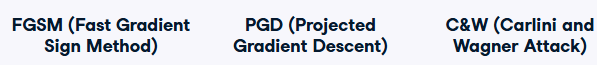\
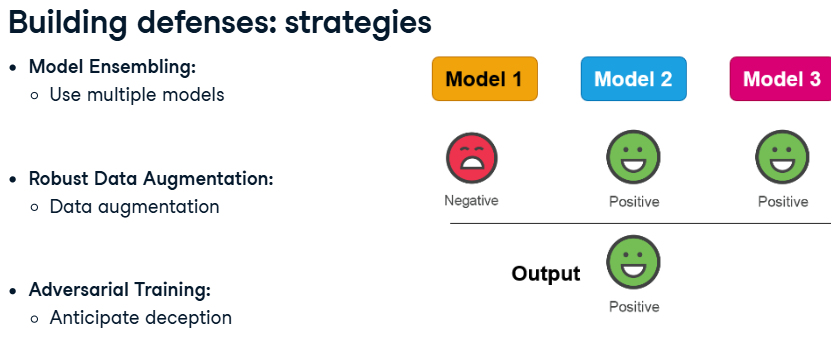
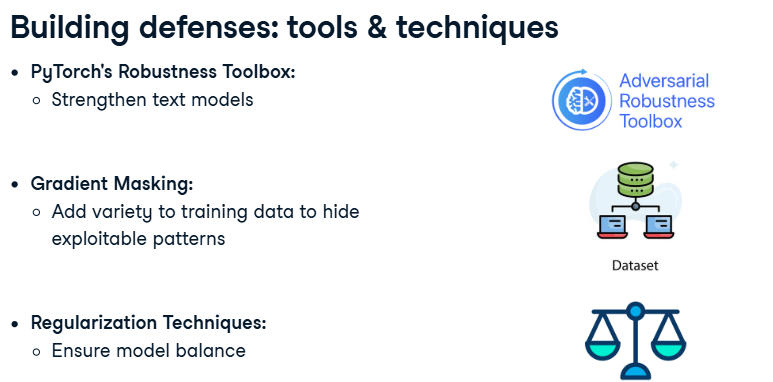